In [1]:
import csv
import pandas as pd
student_df = pd.read_csv('student.csv')

In [2]:
student_df.head()

,Maths,Physics,Chemistry,Result
0,18,29,20,0
1,72,82,77,1
2,97,18,13,0
3,8,42,37,0
4,32,25,20,0


In [3]:
student_df.shape

(1000, 4)

In [4]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#convert input to numpy arrays
X = student_df.drop(columns=['Result'])

y_label = student_df['Result'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)


#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test label is {ytest.shape}")

Shape of train set is (800, 3)
Shape of test set is (200, 3)
Shape of train label is (800, 1)
Shape of test label is (200, 1)


In [5]:
class NeuralNet():
    '''
    A two layer neural network
    '''
    
    def __init__(self, layers=[3,15,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
        
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution 
        '''
        np.random.seed(1)
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1])
        self.params['b1'] = np.random.randn(self.layers[1],)
        self.params["W2"] = np.random.randn(self.layers[1], self.layers[2])
        self.params['b2'] = np.random.randn(self.layers[2],)
        
    def relu(self,Z):
        '''
        The ReLu activation function performs a threshold operation to each input element where
        value less than zero are set to zero.
        '''
        return np.maximum(0,Z)
    
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)
    
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat)
        yhat_inv = self.eta(yhat_inv)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
    
    def forward_propagation(self):
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)
        
         # save calculated parameters
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
        
        return yhat,loss
    
    def back_propagation(self,yhat):
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat
        
        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig
        
        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)
        
        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)
        
        
          #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights()
        
        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
            
            
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 
    
    def acc(self, y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
    
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

In [6]:
nn = NeuralNet()
nn.fit(Xtrain, ytrain)


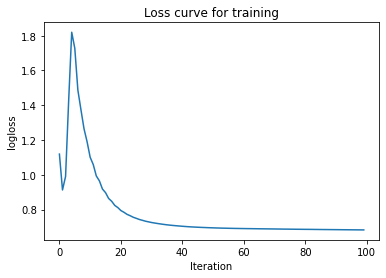

In [7]:
nn.plot_loss()

In [8]:
nn.predict(Xtest)

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],